In [1]:
from rembg.bg import remove
import numpy as np
import io
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [2]:
def show_output(image, volume_model, shine_model, smoothness_model, frizzyness_model, flyaway_model):
    volume = volume_model.predict(image)
    print('Volume: ',np.round(volume[0]))
    shine = shine_model.predict(image)
    print('Shine: ',np.round(shine[0]))
    smoothness = smoothness_model.predict(image)
    print('Smoothness: ',np.round(smoothness[0]))
    frizzyness = frizzyness_model.predict(image)
    print('Frizzyness: ',np.round(frizzyness[0]))
    flyaway = flyaway_model.predict(image)
    print('Flyaway: ',np.round(flyaway[0]))
    return volume, shine, smoothness, frizzyness, flyaway

In [3]:
def display_prediction(image, volume, shine, smoothness, frizzyness, flyaway):
    # Display image and preditions from model
    
    all_preds = np.concatenate((volume[0], shine[0], smoothness[0], frizzyness[0], flyaway[0]))
    result = pd.DataFrame({'Measures':('Volume','Shine','Smoothness','Frizzyness', 'Flyaway'), 'All_Pred':np.round(all_preds)})

    # Show the image
    
    img = px.imshow(image, title='Hair Image After Pre-Processing')
    img.show()

    # Plot a bar plot of predictions
#     bar = px.bar(result.sort_values('All_Pred'), x = 'All_Pred', y = 'Measures', color='Measures', title='Measures of the Hair after applying Product')
#     bar.show()
    
    #Making the webgraph
    web = px.line_polar(result, r='All_Pred', theta='Measures', line_close=True, range_r=[0,5])
    web.update_traces(fill='toself')
    #web.update_layout(range = [0,5])
    web.show()
    
    display(result)

In [48]:
volume_model = load_model('/Volumes/USB-1 1/Capstone Project/Final Models/volume_detection_final.h5')
shine_model = load_model('/Volumes/USB-1 1/Capstone Project/Final Models/shine_detection_final.h5')
smoothness_model = load_model('/Volumes/USB-1 1/Capstone Project/Final Models/smoothness_detection_final.h5')
frizzyness_model = load_model('/Volumes/USB-1 1/Capstone Project/Final Models/frizzyness_detection_final.h5')
flyaway_model = load_model('/Volumes/USB-1 1/Capstone Project/Final Models/flyaway_detection_final.h5')

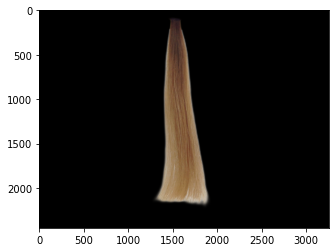

In [49]:
path = '/Users/advait_t/Documents/Capstone Project/Hair_Dataset/bleached_imgs/Time0/1-10/1002.JPG'
image, show_img = pre_process(path)

In [50]:
volume, shine, smoothness, frizzyness, flyaway = show_output(image, volume_model, shine_model, smoothness_model, frizzyness_model, flyaway_model)

Volume:  [3.]
Shine:  [3.]
Smoothness:  [3.]
Frizzyness:  [2.]
Flyaway:  [3.]



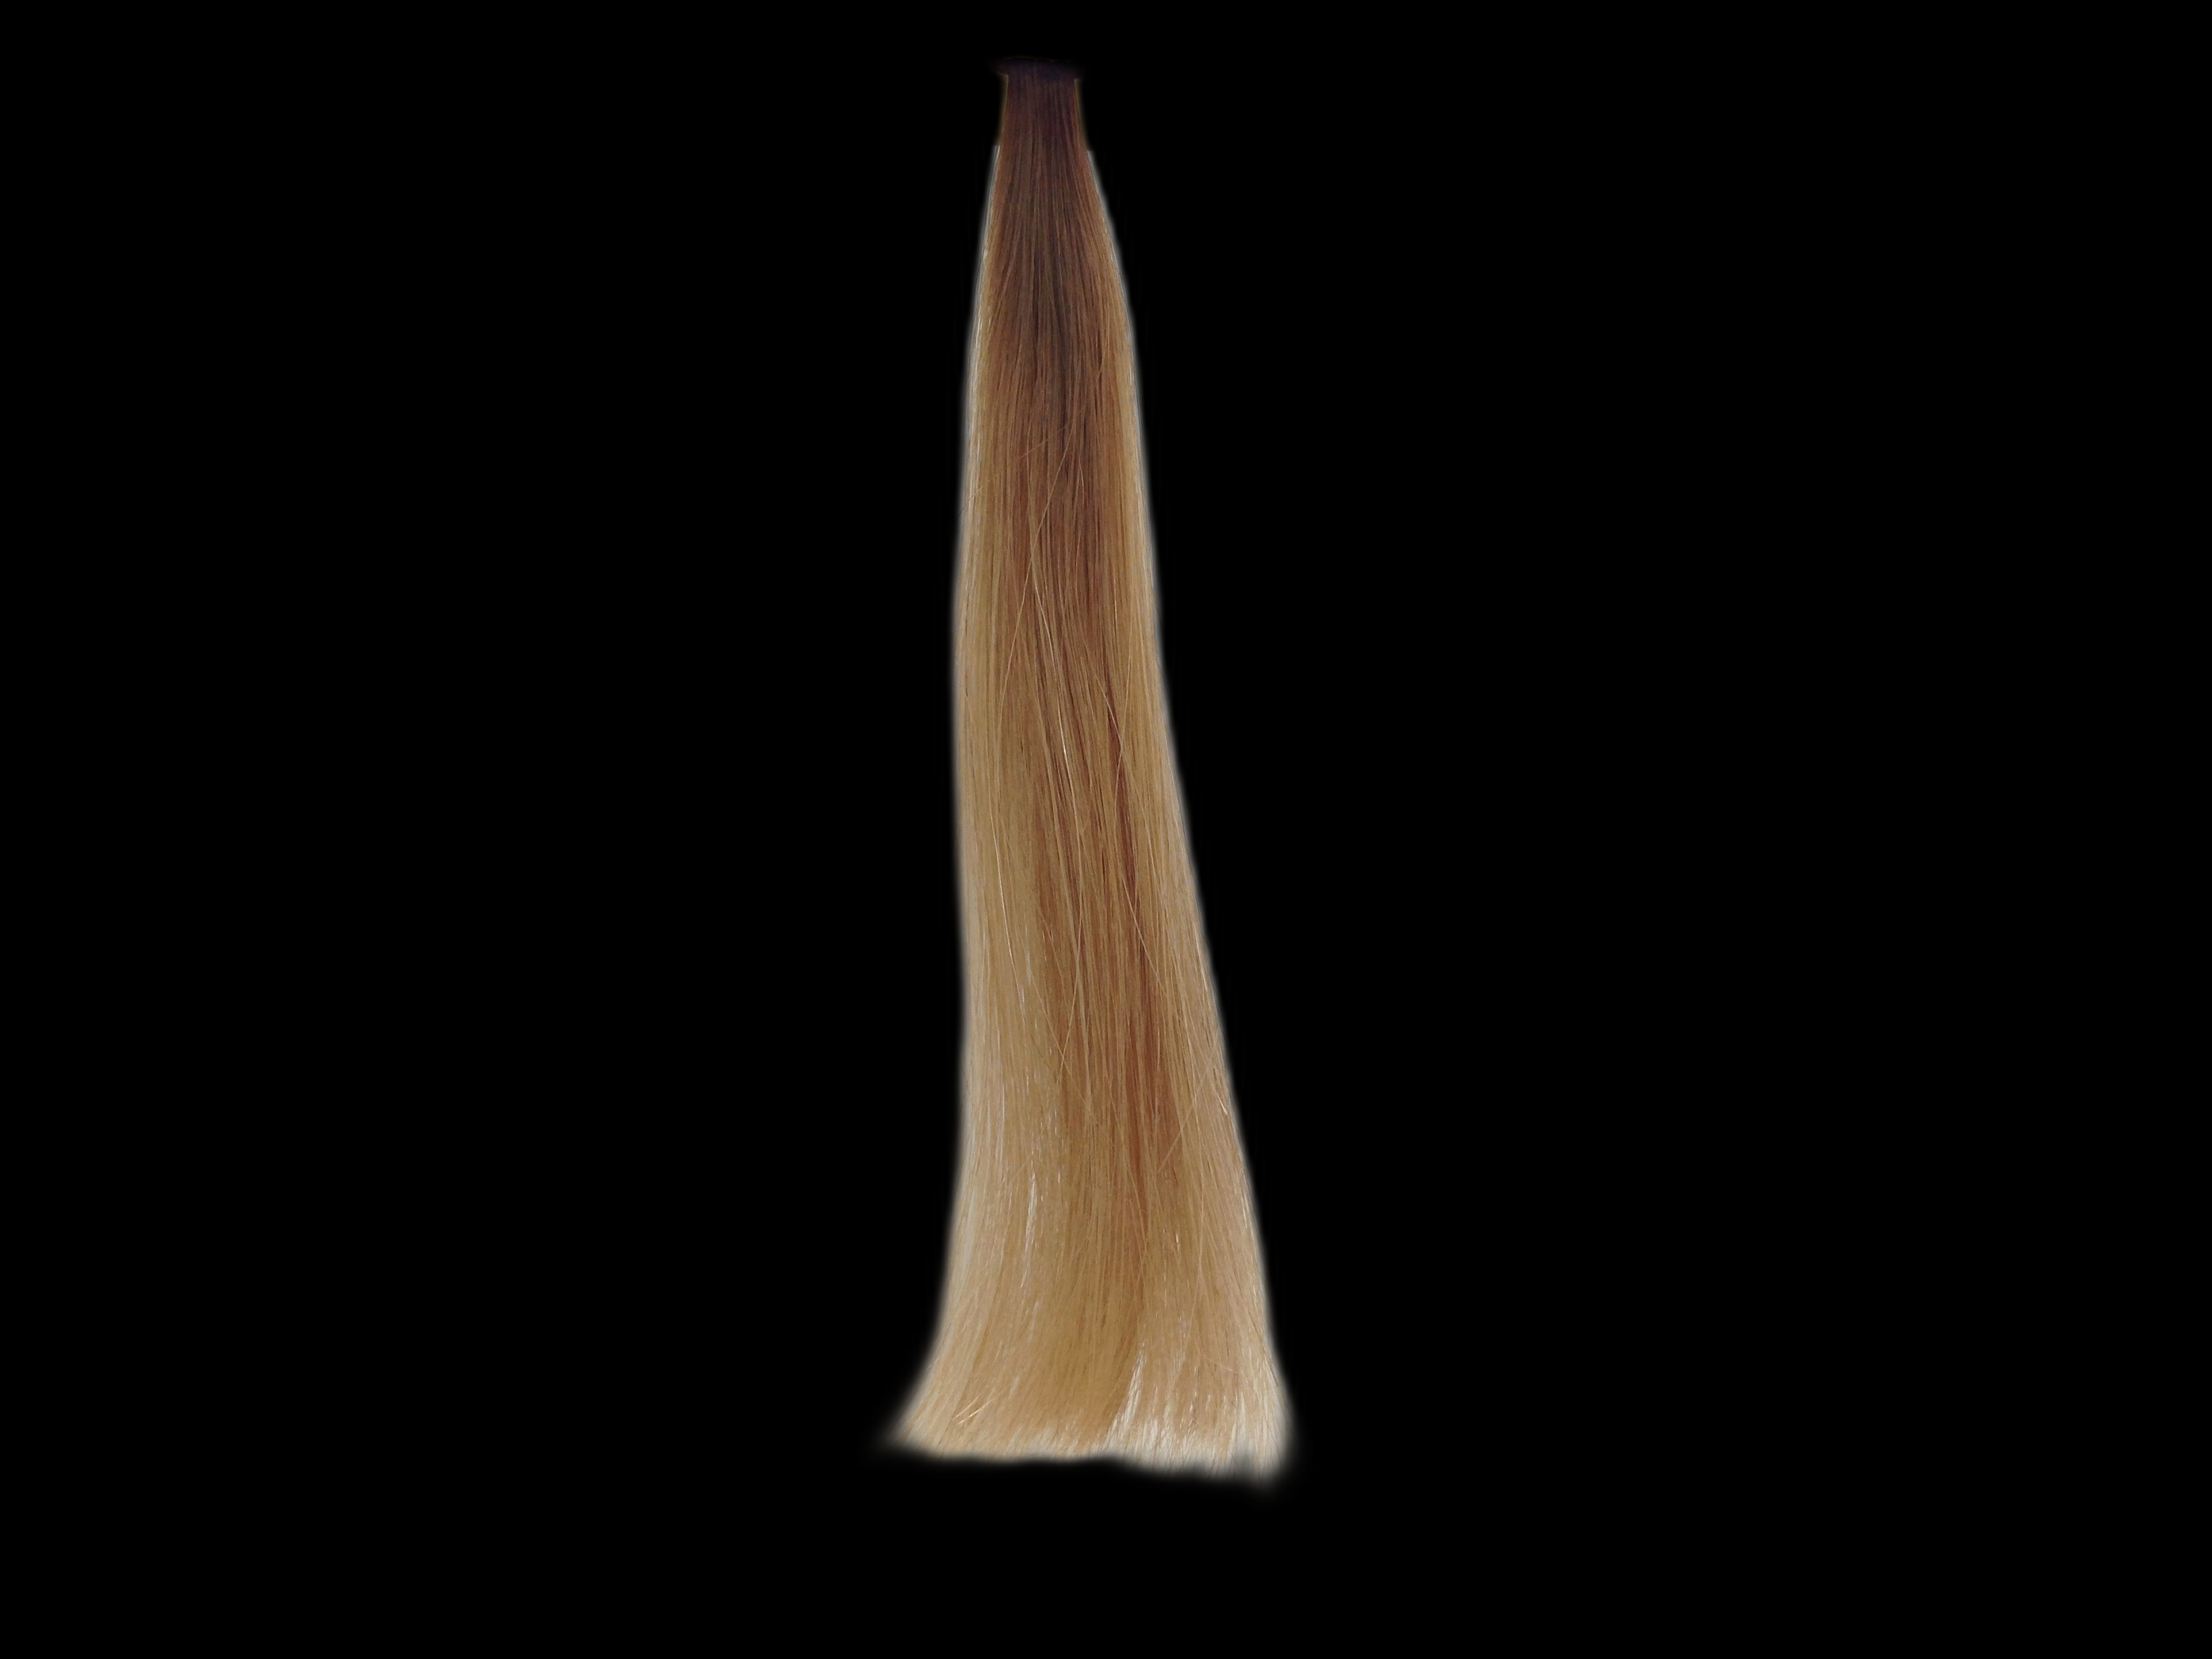

,Measures,All_Pred
0,Volume,3.0
1,Shine,3.0
2,Smoothness,3.0
3,Frizzyness,2.0
4,Flyaway,3.0


In [51]:
display_prediction(show_img, volume, shine, smoothness, frizzyness, flyaway)